In [527]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [528]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [529]:
from sklearn import preprocessing
data = pd.read_csv('/content/TrainData.csv')

data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [530]:
data_op_ori = pd.read_csv('/content/TestData.csv')
data_ori = pd.read_csv('/content/TrainData.csv')

In [531]:
data_op = pd.read_csv('/content/TestData.csv')


In [571]:
data.groupby("make").sum()

,symboling,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,price,Mileage,Dimensions
make,,,,,,,,,,,,,,,,
0,7,3,0,6,2,6,0,7919,4,7,412,15,27.00000,46495,70.50000,1124.20000
1,7,5,1,5,16,4,0,14045,10,6,648,25,43.30000,91905,109.50000,2070.60000
2,1,5,0,7,15,10,0,15045,10,14,854,25,42.80000,140655,109.50000,2062.40000
3,3,3,0,5,7,3,0,5271,5,8,241,3,28.70000,18021,131.00000,1077.90000
4,9,9,3,12,23,9,0,19362,18,18,924,20,77.71000,70879,279.50000,3346.30000
5,7,12,0,19,31,12,0,25302,24,24,1199,6,110.60000,99272,396.00000,4485.10000
6,2,2,0,3,5,4,0,5071,4,4,230,8,17.70000,17833,53.00000,765.50000
7,0,3,0,4,9,6,0,12082,4,11,842,15,27.70000,103800,49.00000,1282.10000
8,19,14,0,24,38,21,0,36393,44,48,1611,27,170.30000,162819,467.00000,6174.70000


In [532]:

data.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000
mean,91.00000,0.85083,98.72928,174.17403,65.94365,53.70994,2564.16575,127.90055,10.15425,25.13260,30.64641,13271.31492
std,52.39434,1.26704,6.11620,12.33657,2.14611,2.49773,523.48902,42.57844,3.98231,6.41821,6.88855,8106.47963
min,1.00000,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,7.00000,13.00000,16.00000,5118.00000
25%,46.00000,0.00000,94.50000,166.80000,64.20000,51.60000,2190.00000,98.00000,8.60000,19.00000,25.00000,7775.00000
50%,91.00000,1.00000,96.90000,173.20000,65.50000,54.10000,2420.00000,120.00000,9.00000,24.00000,30.00000,10295.00000
75%,136.00000,2.00000,102.40000,183.10000,66.60000,55.50000,2935.00000,146.00000,9.40000,30.00000,34.00000,16500.00000
max,181.00000,3.00000,120.90000,208.10000,72.00000,59.80000,4066.00000,326.00000,23.00000,49.00000,54.00000,45400.00000


In [533]:
#print(data['normalized-losses'].mean())

In [534]:
data["Mileage"] = (data["city-mpg"]+data["highway-mpg"])/2
data["Dimensions"] = data["wheel-base"]+data["length"]+data["width"]+data["height"]
data.drop(["city-mpg"], axis=1,inplace = True)
data.drop(["highway-mpg"], axis=1,inplace = True)
data.drop(["wheel-base"], axis=1,inplace = True)
data.drop(["length"], axis=1,inplace = True)
data.drop(["width"], axis=1,inplace = True)
data.drop(["height"], axis=1,inplace = True)


data_op["Mileage"] = (data_op["city-mpg"]+data_op["highway-mpg"])/2
data_op["Dimensions"] = data_op["wheel-base"]+data_op["length"]+data_op["width"]+data_op["height"]
data_op.drop(["city-mpg"], axis=1,inplace = True)
data_op.drop(["highway-mpg"], axis=1,inplace = True)
data_op.drop(["wheel-base"], axis=1,inplace = True)
data_op.drop(["length"], axis=1,inplace = True)
data_op.drop(["width"], axis=1,inplace = True)
data_op.drop(["height"], axis=1,inplace = True)

In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 23 columns):
ID                   181 non-null int64
symboling            181 non-null int64
normalized-losses    181 non-null object
make                 181 non-null object
fuel-type            181 non-null object
aspiration           181 non-null object
num-of-doors         181 non-null object
body-style           181 non-null object
drive-wheels         181 non-null object
engine-location      181 non-null object
curb-weight          181 non-null int64
engine-type          181 non-null object
num-of-cylinders     181 non-null object
engine-size          181 non-null int64
fuel-system          181 non-null object
bore                 181 non-null object
stroke               181 non-null object
compression-ratio    181 non-null float64
horsepower           181 non-null object
peak-rpm             181 non-null object
price                181 non-null int64
Mileage              181 non-null floa

In [536]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
  
    print(); print(to_drop)


[]


In [537]:


data.drop(data[to_drop], axis=1,inplace = True)
data.drop('ID', axis = 1,inplace=True)

data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('ID', axis = 1,inplace=True)


In [538]:
#data['month'] = data['month'].astype("str")
#data['day'] = data['day'].astype("str")
#data['hour'] = data['hour'].astype("str")

#data_op['month'] = data_op['month'].astype("str")
#data_op['day'] = data_op['day'].astype("str")
#data_op['hour'] = data_op['hour'].astype("str")
#data.info()

In [539]:

#data['MDH'] = data['month'] + data['day']+data['hour']
#data.drop('month', axis = 1,inplace=True)
#data.drop('day', axis = 1,inplace=True)
#data.drop('hour', axis = 1,inplace=True)
#data.head(10)

In [540]:

#data_op['MDH'] = data_op['month'] + data_op['day']+data_op['hour']
#data_op.drop('month', axis = 1,inplace=True)
#data_op.drop('day', axis = 1,inplace=True)
#data_op.drop('hour', axis = 1,inplace=True)
#data_op.head(10)

In [541]:
data["price"].dtype

dtype('int64')

In [542]:
#data.groupby("Dimensions").count()

In [543]:
x=pd.DataFrame(data)
x.drop("price",axis =1,inplace=True)
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,Mileage,Dimensions
0,-1,65,toyota,gas,std,four,hatchback,fwd,front,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,29.50000,398.40000
1,0,188,bmw,gas,std,two,sedan,rwd,front,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,24.50000,397.10000
2,0,?,renault,gas,std,four,wagon,fwd,front,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,27.00000,399.30000
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,30.50000,419.70000
4,-2,103,volvo,gas,std,four,sedan,rwd,front,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,26.00000,416.50000


In [544]:
data_mean = pd.DataFrame(data)
data_op_mean = pd.DataFrame(data_op)
x_mean = pd.DataFrame(x)

data_mean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,Mileage,Dimensions
0,-1,65,toyota,gas,std,four,hatchback,fwd,front,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,11248,29.50000,398.40000
1,0,188,bmw,gas,std,two,sedan,rwd,front,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,20970,24.50000,397.10000
2,0,?,renault,gas,std,four,wagon,fwd,front,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,9295,27.00000,399.30000
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,13200,30.50000,419.70000
4,-2,103,volvo,gas,std,four,sedan,rwd,front,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,15985,26.00000,416.50000


In [545]:
strcolumns = x.columns

for each in strcolumns:
  data_mean.drop(data_mean[data_mean[each] == "?"].index, inplace=True)
  data_op_mean.drop(data_op_mean[data_op_mean[each] == "?"].index, inplace=True)
  x_mean.drop(x_mean[x_mean[each] == "?"].index, inplace=True)
strcolumns = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
strcolumns



['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [546]:
x_mean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,Mileage,Dimensions
0,-1,65,toyota,gas,std,four,hatchback,fwd,front,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,29.50000,398.40000
1,0,188,bmw,gas,std,two,sedan,rwd,front,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,24.50000,397.10000
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,30.50000,419.70000
4,-2,103,volvo,gas,std,four,sedan,rwd,front,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,26.00000,416.50000
5,1,118,dodge,gas,turbo,two,hatchback,fwd,front,2128,ohc,four,98,mpfi,3.03,3.39,7.60000,102,5500,27.00000,365.60000


In [547]:
data_mean[data_mean.columns[1]] = data_mean[data_mean.columns[1]].astype("float64")
data_mean[data_mean.columns[17]] = data_mean[data_mean.columns[17]].astype("float64")
data_mean[data_mean.columns[18]] = data_mean[data_mean.columns[18]].astype("float64")
data_mean[data_mean.columns[14]] = data_mean[data_mean.columns[14]].astype("float64")
data_mean[data_mean.columns[15]] = data_mean[data_mean.columns[15]].astype("float64")

data_op_mean[data_mean.columns[1]] = data_op_mean[data_op_mean.columns[1]].astype("float64")
data_op_mean[data_mean.columns[17]] = data_op_mean[data_op_mean.columns[17]].astype("float64")
data_op_mean[data_mean.columns[18]] = data_op_mean[data_op_mean.columns[18]].astype("float64")
data_op_mean[data_op_mean.columns[14]] = data_op_mean[data_op_mean.columns[14]].astype("float64")
data_op_mean[data_op_mean.columns[15]] = data_op_mean[data_op_mean.columns[15]].astype("float64")

x_mean[data_mean.columns[1]] = x_mean[x_mean.columns[1]].astype("float64")
x_mean[data_mean.columns[17]] = x_mean[x_mean.columns[17]].astype("float64")
x_mean[data_mean.columns[18]] = x_mean[x_mean.columns[18]].astype("float64")
x_mean[data_mean.columns[14]] = x_mean[x_mean.columns[14]].astype("float64")
x_mean[data_mean.columns[15]] = x_mean[x_mean.columns[15]].astype("float64")

In [548]:
data.dropna(inplace=True)

data.replace("?", data_mean.mean(), inplace = True)
data_op.replace("?", data_op_mean.mean(), inplace = True)
x.replace("?", x_mean.mean(), inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,Mileage,Dimensions
0,-1,65,toyota,gas,std,four,hatchback,fwd,front,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,11248,29.50000,398.40000
1,0,188,bmw,gas,std,two,sedan,rwd,front,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,20970,24.50000,397.10000
2,0,119.85211,renault,gas,std,four,wagon,fwd,front,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,96.44366,5103.52113,9295,27.00000,399.30000
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,13200,30.50000,419.70000
4,-2,103,volvo,gas,std,four,sedan,rwd,front,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,15985,26.00000,416.50000


In [549]:
x_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 178
Data columns (total 21 columns):
symboling            142 non-null int64
normalized-losses    142 non-null float64
make                 142 non-null object
fuel-type            142 non-null object
aspiration           142 non-null object
num-of-doors         142 non-null object
body-style           142 non-null object
drive-wheels         142 non-null object
engine-location      142 non-null object
curb-weight          142 non-null int64
engine-type          142 non-null object
num-of-cylinders     142 non-null object
engine-size          142 non-null int64
fuel-system          142 non-null object
bore                 142 non-null float64
stroke               142 non-null float64
compression-ratio    142 non-null float64
horsepower           142 non-null float64
peak-rpm             142 non-null float64
Mileage              142 non-null float64
Dimensions           142 non-null float64
dtypes: float64(8), int64(3),

In [550]:
y=data["price"]
y.head()

0    11248
1    20970
2     9295
3    13200
4    15985
Name: price, dtype: int64

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 22 columns):
symboling            181 non-null int64
normalized-losses    181 non-null object
make                 181 non-null object
fuel-type            181 non-null object
aspiration           181 non-null object
num-of-doors         181 non-null object
body-style           181 non-null object
drive-wheels         181 non-null object
engine-location      181 non-null object
curb-weight          181 non-null int64
engine-type          181 non-null object
num-of-cylinders     181 non-null object
engine-size          181 non-null int64
fuel-system          181 non-null object
bore                 181 non-null object
stroke               181 non-null object
compression-ratio    181 non-null float64
horsepower           181 non-null object
peak-rpm             181 non-null object
price                181 non-null int64
Mileage              181 non-null float64
Dimensions           181 non-null fl

In [552]:



label_encoder = preprocessing.LabelEncoder()
for each in strcolumns :
    x[each] = label_encoder.fit_transform(x[each])


label_encoder = preprocessing.LabelEncoder()
for each in strcolumns :
    data_op[each] = label_encoder.fit_transform(data_op[each])

label_encoder = preprocessing.LabelEncoder()
for each in strcolumns :
    data[each] = label_encoder.fit_transform(data[each])

In [553]:
#data.groupby(["gender"]).count()

In [554]:
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,Mileage,Dimensions
0,-1,65,19,1,0,1,2,1,0,2458,2,2,122,5,3.31,3.54,8.70000,92,4200,29.50000,398.40000
1,0,188,2,1,0,2,3,2,0,2710,2,3,164,5,3.31,3.19,9.00000,121,4250,24.50000,397.10000
2,0,119.85211,16,1,0,1,4,1,0,2579,2,2,132,5,3.46,3.9,8.70000,96.44366,5103.52113,27.00000,399.30000
3,0,161,13,0,1,1,3,2,0,3197,1,2,152,3,3.7,3.52,21.00000,95,4150,30.50000,419.70000
4,-2,103,21,1,0,1,3,2,0,2935,2,2,141,5,3.78,3.15,9.50000,114,5400,26.00000,416.50000


In [555]:
data.head(182)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,Mileage,Dimensions
0,-1,65,19,1,0,1,2,1,0,2458,2,2,122,5,3.31,3.54,8.70000,92,4200,11248,29.50000,398.40000
1,0,188,2,1,0,2,3,2,0,2710,2,3,164,5,3.31,3.19,9.00000,121,4250,20970,24.50000,397.10000
2,0,119.85211,16,1,0,1,4,1,0,2579,2,2,132,5,3.46,3.9,8.70000,96.44366,5103.52113,9295,27.00000,399.30000
3,0,161,13,0,1,1,3,2,0,3197,1,2,152,3,3.7,3.52,21.00000,95,4150,13200,30.50000,419.70000
4,-2,103,21,1,0,1,3,2,0,2935,2,2,141,5,3.78,3.15,9.50000,114,5400,15985,26.00000,416.50000
5,1,118,4,1,1,2,2,1,0,2128,2,2,98,5,3.03,3.39,7.60000,102,5500,7957,27.00000,365.60000
6,0,145,7,1,0,1,3,2,0,4066,0,3,258,5,3.63,4.17,8.10000,176,4750,32250,17.00000,435.00000
7,3,119.85211,15,1,0,2,1,2,1,2756,3,3,194,5,3.74,2.9,9.50000,207,5900,32528,21.00000,375.00000
8,0,89,18,1,0,1,4,1,0,2455,3,2,108,5,3.62,2.64,9.00000,94,5200,10198,28.00000,388.90000
9,3,153,11,1,1,2,2,1,0,2370,2,2,110,6,3.17,3.46,7.50000,116,5500,9959,26.50000,384.10000


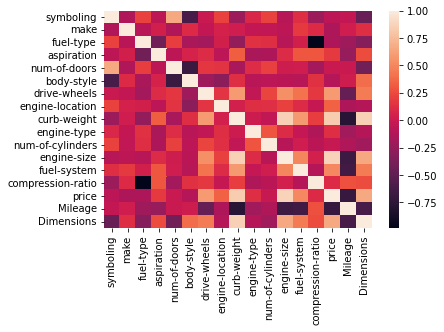

In [556]:
sns.heatmap(data.corr())

In [557]:
#sns.pairplot(data=data, size=2.5, diag_kind='kde')

#plt.show()

In [558]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [559]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(179, 21)
(179,)
(2, 21)
(2,)


In [560]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [561]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

lr = LinearRegression()

#param_grid = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
  #               'max_depth': list(range(2,500)),
   #             'max_features': ['auto', 'sqrt', 'log2'],
    #            'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




LinearRegression()

In [562]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [563]:
y_test_pred_op = lr.predict(x_test)


In [564]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,19850.69788
1,19027.13485


In [565]:

op = pd.DataFrame(data_op_ori["ID"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('ID')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['ID', 'OP']

op.head(2)


,ID,OP
0,1,19850.69788
1,2,19027.13485


In [566]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [567]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [568]:
x_test.shape

(20, 21)

In [569]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))